In [1]:
# create_db.py
# Run this once to create a sample SQLite database (sales_data.db) with example data.
import sqlite3

conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# Create table
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    sale_date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample rows
sample_data = [
    ("2025-09-01", "Pen", 10, 2.5),
    ("2025-09-02", "Notebook", 5, 15.0),
    ("2025-09-02", "Pen", 7, 2.5),
    ("2025-09-03", "Pencil", 20, 1.0),
    ("2025-09-04", "Notebook", 3, 15.0),
    ("2025-09-05", "Pencil", 10, 1.0),
    ("2025-09-06", "Eraser", 8, 0.5),
]
cur.executemany("INSERT INTO sales (sale_date, product, quantity, price) VALUES (?, ?, ?, ?)", sample_data)

conn.commit()
conn.close()
print("Created sales_data.db with sample data.")


Created sales_data.db with sample data.


In [2]:
!pip install matplotlib

Sales summary by product:
 product  total_qty  revenue
Notebook         40    600.0
     Pen         85    212.5
  Pencil        150    150.0
  Eraser         40     20.0
Saved chart to sales_chart.png


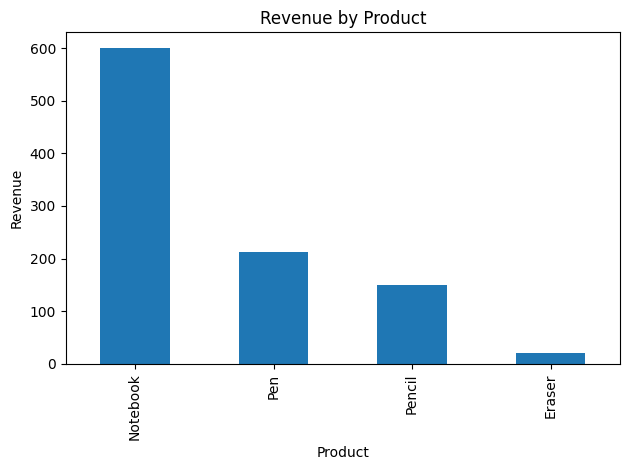

In [3]:
# sales_summary.py
# Run this to connect to sales_data.db, query sales summary, print results, and save a bar chart.
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1) Connect to the database
conn = sqlite3.connect("sales_data.db")

# 2) SQL query: total quantity and revenue by product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

# 3) Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# 4) Print the table to the screen
print("Sales summary by product:")
print(df.to_string(index=False))

# 5) Plot a simple bar chart of revenue by product
ax = df.plot(kind='bar', x='product', y='revenue', legend=False)
ax.set_ylabel("Revenue")
ax.set_xlabel("Product")
ax.set_title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
print("Saved chart to sales_chart.png")

# 6) Close connection
conn.close()
